In [2]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [3]:
year = 2021 #GP year
gp = 'Abu Dhabi' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [5]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


NotADirectoryError: Cache directory does not exist! Please check for typos or create it first.

In [5]:

# Get qualification session
session = fastf1.get_session(year, gp, event)
laps = session.load_laps()
laps.dropna(subset=['Driver'], inplace = True)


core           INFO 	Loading laps for Abu Dhabi Grand Prix - Qualifying [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '33', '77', '11', '4', '22', '10', '55', '3', '16', '18', '31', '7', '99', '14', '5', '63', '6', '47', '9']


In [6]:

# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)


['HAM' 'VER' 'BOT' 'PER' 'NOR' 'TSU' 'GAS' 'SAI' 'RIC' 'LEC' 'STR' 'OCO'
 'RAI' 'GIO' 'ALO' 'VET' 'RUS' 'LAT' 'MSC' 'MAZ']


In [38]:

# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [39]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)


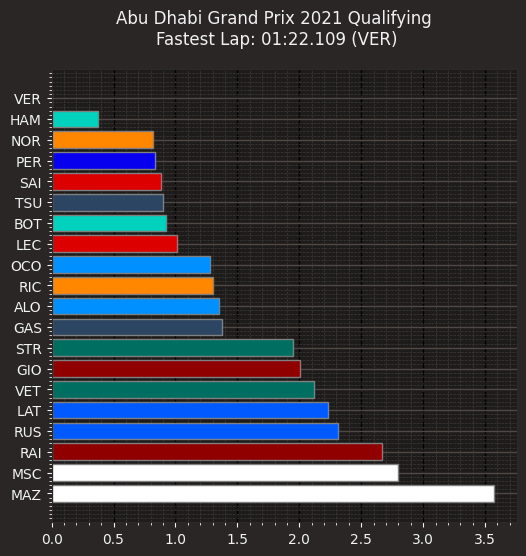

In [40]:

# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.weekend.name} {session.weekend.year} Qualifying \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.show()
